# Titanic Dataset EDA

This notebook performs Exploratory Data Analysis on the Titanic dataset, cleans missing values, creates new features, and visualizes key survival patterns.

## Imports and Display setup

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")
%matplotlib inline

pd.options.display.max_columns = 60
pd.options.display.width = 160

df = pd.read_csv("train.csv")
print("Loaded dataset with shape:", df.shape)
display(df.head())

Loaded dataset with shape: (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Dataset Info and Summary Stats

In [ ]:
print("Data info:")
display(df.info())
print("\nSummary statistics (numeric):")
display(df.describe().T)


Data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
 12  HasCabin     891 non-null    int64  
 13  Sex_code     891 non-null    int64  
 14  FamilySize   891 non-null    int64  
 15  IsAlone      891 non-null    int64  
 16  Title        891 non-null    object 
dtypes: float64(2), int64(9), object(6)
memory usage: 118.5+ KB


None


Summary statistics (numeric):


,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,891.0,29.112424,13.304424,0.42,21.5000,26.0000,36.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292
HasCabin,891.0,0.228956,0.420397,0.00,0.0000,0.0000,0.0,1.0000
Sex_code,891.0,0.352413,0.477990,0.00,0.0000,0.0000,1.0,1.0000
FamilySize,891.0,1.904602,1.613459,1.00,1.0000,1.0000,2.0,11.0000


## Check missing values & Duplicates before cleaning

In [15]:
print("Duplicate values before cleaning:", df.duplicated().sum(), "\n")
print("Missing values before cleaning:\n", df.isnull().sum(), "\n")

# 1. Fill missing values
# Handle Embarked - fill with most common value
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Handle Fare - fill with median
df['Fare'] = df['Fare'].fillna(df['Fare'].median())

# Handle Age - fill with median based on Passenger Class and Sex
df['Age'] = df.groupby(['Pclass', 'Sex'])['Age'].transform(lambda x: x.fillna(x.median()))

# 2. Feature Engineering
# Create binary features
df['HasCabin'] = df['Cabin'].notna().astype(int)
df['Sex_code'] = (df['Sex'] == 'female').astype(int)

# Create family features
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)

# Extract titles from names and clean them
df['Title'] = df['Name'].str.extract(r',\s*([^\.]+)\.', expand=False).str.strip()
# Group rare titles
title_counts = df['Title'].value_counts()
rare_titles = title_counts[title_counts < 10].index
df['Title'] = df['Title'].replace(rare_titles, 'Rare')

# Verify no missing values remain
print("Missing values after cleaning:\n", df.isnull().sum(), "\n")

# Display sample of cleaned data
df.head()

Duplicate values before cleaning: 0 

Missing values before cleaning:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
HasCabin         0
Sex_code         0
FamilySize       0
IsAlone          0
Title            0
dtype: int64 

Missing values after cleaning:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
HasCabin         0
Sex_code         0
FamilySize       0
IsAlone          0
Title            0
dtype: int64 



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,HasCabin,Sex_code,FamilySize,IsAlone,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,2,0,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,1,2,0,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,1,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,1,2,0,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0,1,1,Mr


## BASIC GROUP INSIGHTS - Short Summary

In [5]:
# 1. Overall survival rate
overall_survival = df['Survived'].mean()
print(f"Overall survival rate: {overall_survival:.2%}\n")

# 2. Survival rate by Sex
print("Survival rate by Sex:")
print(df.groupby('Sex')['Survived'].mean(), "\n")

# 3. Survival rate by Passenger Class
print("Survival rate by Pclass (passenger class):")
print(df.groupby('Pclass')['Survived'].mean(), "\n")

# 4. Survival rate by Title
print("Survival rate by Title (approx):")
print(df.groupby('Title')['Survived'].mean().sort_values(ascending=False), "\n")

# 5. Survival rate by IsAlone
print("Survival rate by IsAlone (1 = alone):")
print(df.groupby('IsAlone')['Survived'].mean())


Overall survival rate: 38.38%

Survival rate by Sex:
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64 

Survival rate by Pclass (passenger class):
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64 

Survival rate by Title (approx):
Title
Mrs       0.792000
Miss      0.697802
Master    0.575000
Rare      0.444444
Mr        0.156673
Name: Survived, dtype: float64 

Survival rate by IsAlone (1 = alone):
IsAlone
0    0.505650
1    0.303538
Name: Survived, dtype: float64


## Visualizing Key Patterns in Survival

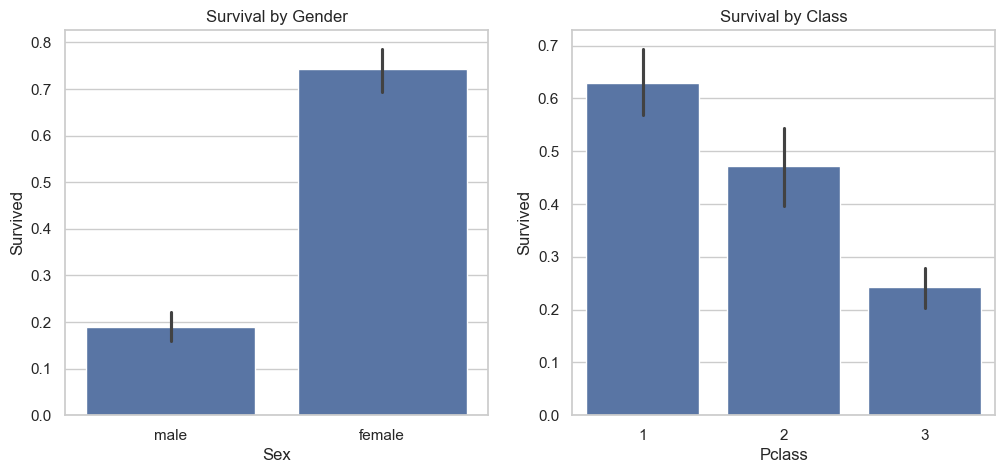

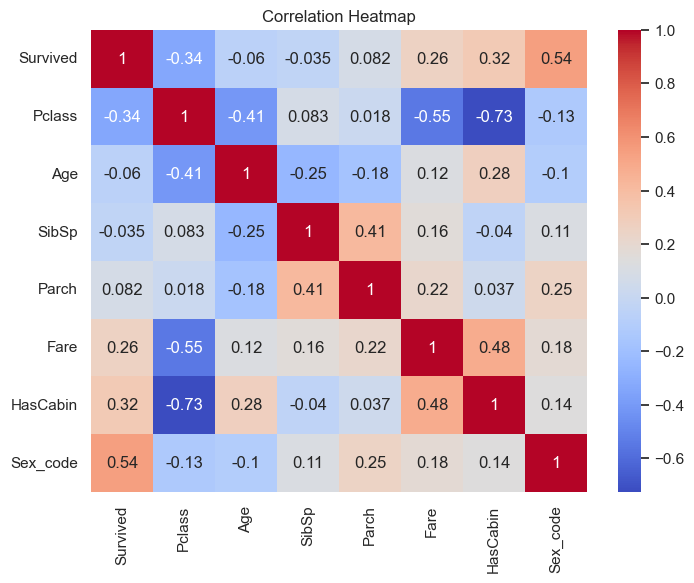

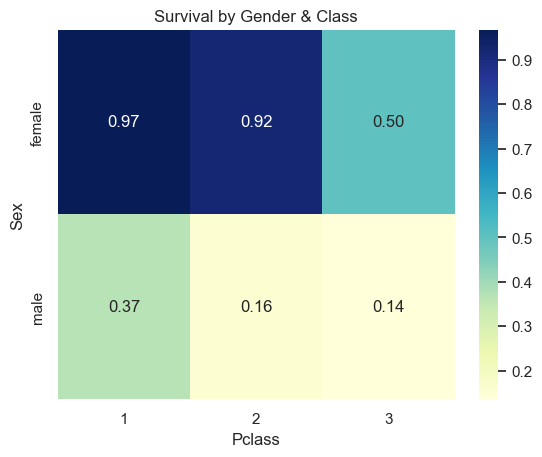

In [ ]:
plt.figure(figsize=(12,5))

# ----- Plot 1: Survival by Gender -----
plt.subplot(1,2,1)
sns.barplot(x='Sex', y='Survived', data=df)
plt.title("Survival by Gender")


# ----- Plot 2: Survival by Class -----
plt.subplot(1,2,2)
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title("Survival by Class")
plt.show()


# ----- Correlation Heatmap -----
plt.figure(figsize=(8,6))
sns.heatmap(df[['Survived','Pclass','Age','SibSp','Parch','Fare','HasCabin','Sex_code']].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# ----- Survival by Gender & Class (pivot + heatmap) -----
pivot = df.pivot_table(values='Survived', index='Sex', columns='Pclass')
sns.heatmap(pivot, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Survival by Gender & Class")
plt.show()


## Save the Cleaned Dataset

In [7]:
df.to_csv("titanic_cleaned.csv", index=False)
print("Cleaned dataset saved to titanic_cleaned.csv")


Cleaned dataset saved to titanic_cleaned.csv


## FINAL NOTES
---
### What you did:
- Loaded Titanic dataset
- Cleaned missing values & engineered features
- Found survival patterns by gender, class, etc.
- Visualized data with bar plots & heatmaps
- Saved cleaned dataset for reuse
